# Chicago Airbnb Data Analysis

## Investigation Overview

This dataset including the information about the hosts, the information about the position of the Airbnb( neighborhood, latitude, longitude) which can use for map plot, describe of the room, and price, etc. Which will be a good dataset for data visualization and prediction.

## Dataset Overview

There are 5,265 airbnbs in the dataset with 15 features ('id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365').

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe and clean up field dtypes
df_analysis = pd.read_csv('chicago_airbnb_data.csv')

df_analysis['id'] = df_analysis['id'].astype('str')
df_analysis['host_id'] = df_analysis['host_id'].astype('str')
df_analysis['last_review'] = pd.to_datetime(df_analysis['last_review'])
df_analysis['room_type'] = df_analysis['room_type'].astype('category')
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4897 entries, 0 to 4896
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              4897 non-null   object        
 1   name                            4897 non-null   object        
 2   host_id                         4897 non-null   object        
 3   host_name                       4897 non-null   object        
 4   neighbourhood                   4897 non-null   object        
 5   latitude                        4897 non-null   float64       
 6   longitude                       4897 non-null   float64       
 7   room_type                       4897 non-null   category      
 8   price                           4897 non-null   int64         
 9   minimum_nights                  4897 non-null   int64         
 10  number_of_reviews               4897 non-null   int64         
 11  last

## Price, Room Type, and Neighbourhood Distribution

It's possible to see that there are more airbnbs with prices between 60 and 80 dollars, also, looking at the price of each room type, it is possible to conclude that Entire home or apartment is the most expensive room type, following by hotel room. Finally, studying the neighborhood, it's possible to see that West Town, Lake View, and Near North Side have the biggest number of airbnb in Chicago. So, those are the three most important features in this analysis, and now, they will be combined.

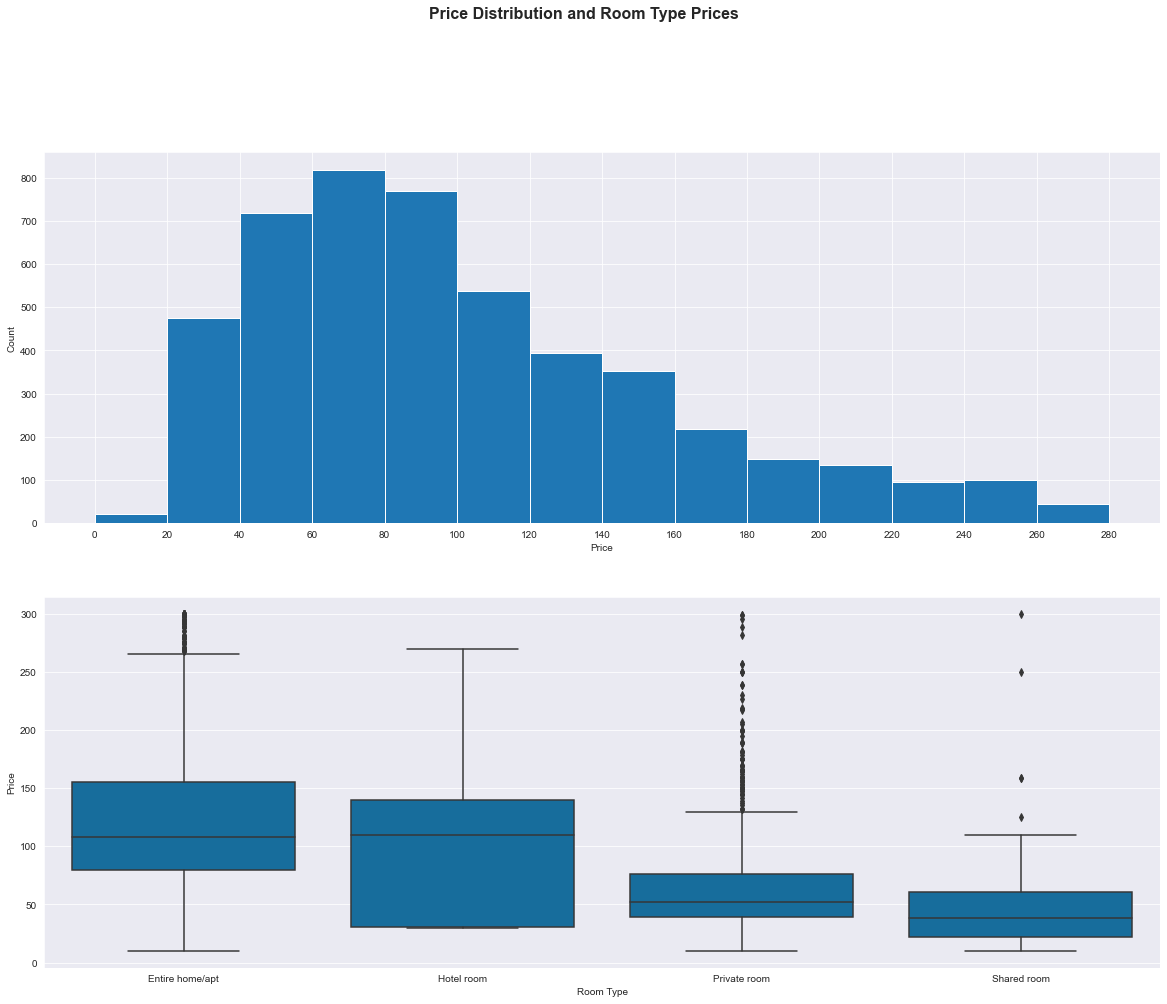

In [41]:
plt.figure(figsize=[20, 15]);
base_color = sb.color_palette('colorblind')[0];
sb.set_style('darkgrid');

plt.subplot(2, 1, 1);
bins = np.arange(0, 300, 20)
plt.hist(data=df_analysis, x='price', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Price');
plt.ylabel('Count');

plt.subplot(2, 1, 2);
base_color = sb.color_palette('colorblind')[0]
sb.boxplot(data=df_analysis, x='room_type', y='price', color=base_color );
plt.xlabel('Room Type');
plt.ylabel('Price');
plt.suptitle('Price Distribution and Room Type Prices', fontsize=16, fontweight='semibold', y=1.015);

Text(0.5, 1.015, 'Number of Airbnbs over Neighbourhood')

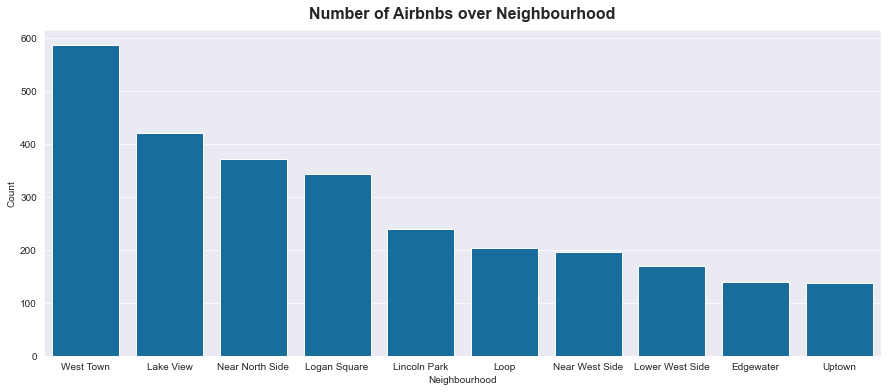

In [23]:
base_color = sb.color_palette('colorblind')[0];
sb.set_style('darkgrid');


plt.rcParams['figure.figsize'] = 15, 6
base_color = sb.color_palette('colorblind')[0]
sb.countplot(data=df_analysis, x='neighbourhood', color=base_color, order = df_analysis['neighbourhood'].value_counts().head(10).index);
plt.xlabel('Neighbourhood');
plt.ylabel('Count');
plt.title('Number of Airbnbs over Neighbourhood', fontsize=16, fontweight='semibold', y=1.015)

## Which place has the biggest average price of Chicago?¶

When we look on the next first graph, we can see that Loop is the most expensive, but the question around this is why this place is so expensive. For answer this question, in the last graph of this view, we can see these three features together in one graph, and conclude that Loop is the part of Chicago that has the biggest average price, because there is the most expensive entire home (most expensive room type) and private room.

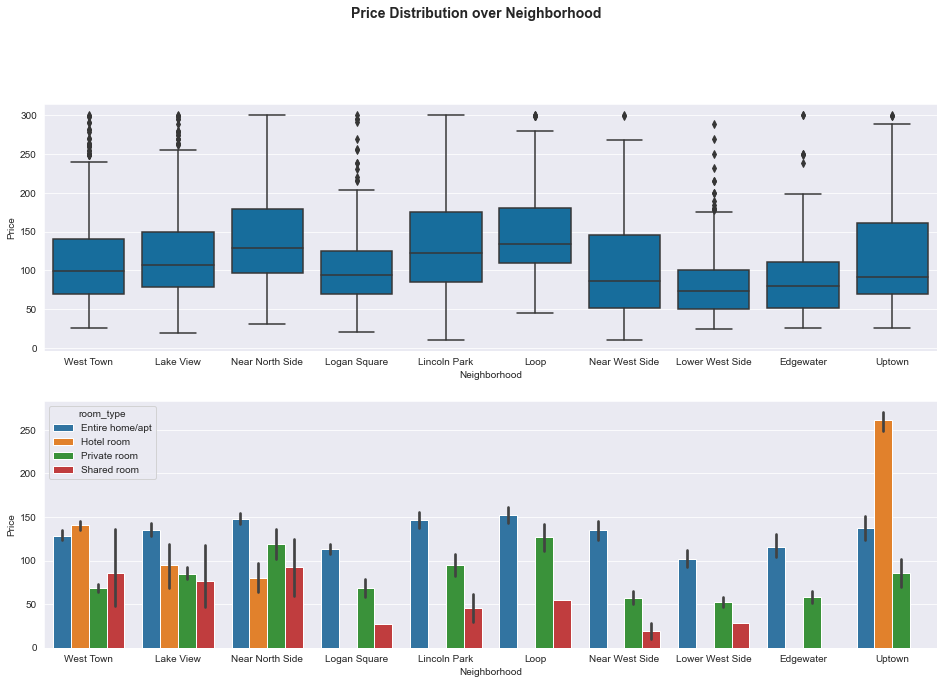

In [34]:
plt.figure(figsize=[16, 10]);
plt.subplot(2, 1, 1)
sb.boxplot(data=df_analysis, x='neighbourhood', y='price', color=base_color,order = df_analysis['neighbourhood'].value_counts().head(10).index );
plt.xlabel('Neighborhood');
plt.ylabel('Price');
plt.subplot(2, 1, 2)
sb.barplot(data=df_analysis, x='neighbourhood', y='price', hue='room_type', order = df_analysis['neighbourhood'].value_counts().head(10).index);
plt.xlabel('Neighborhood');
plt.ylabel('Price');
plt.suptitle('Price Distribution over Neighborhood', fontsize=14, fontweight='semibold', y=1.015);

## Where does the most expensive Airbnbs are located?¶

There is a zone that has more expensive airbnbs, this zone is located between -87.65 and -87.60 longitude and 41.85 and 41.90 latitude. Perhaps the reason is that this zone is the center of Chicago or a touristic area.

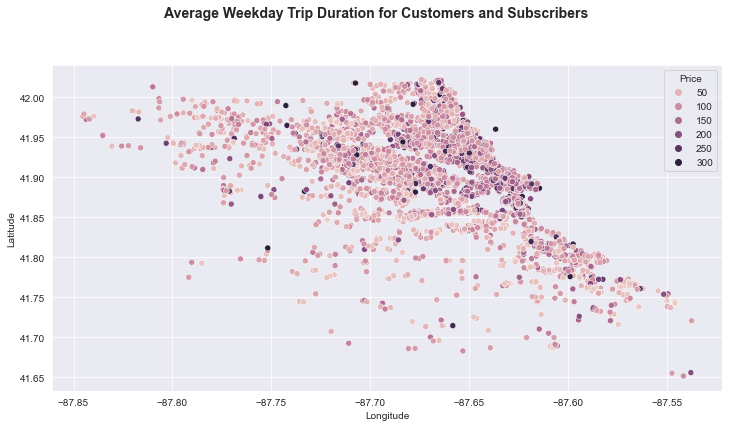

In [45]:
plt.figure(figsize=[12, 6]);
ax = sb.scatterplot(df_analysis.longitude,df_analysis.latitude,hue=df_analysis.price)
ax.legend(title='Price');
plt.xlabel('Longitude');
plt.ylabel('Latitude');
plt.suptitle('Average Weekday Trip Duration for Customers and Subscribers', fontsize=14, fontweight='semibold', y=1.015);

## Summary

The regular price of an airbnb in Chicago is between 60 and 80 dollars and located in West Town. If the traveler has more money, can look for an entire place located at Loop, the most expensive area with the most expensive room type. And, finally, if the traveler analyzes only the location, and not the neighborhood, it is good to keep in mind that between -87.65 and -87.60 longitude and 41.85 and 41.90 latitude has the most expensive airbnbs if he or she quit this area, would be an economy.